In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle as pk


In [147]:
#Data Cleaning and Feature Engineering

# Load the dataset
cars_data = pd.read_csv('DATASET/Car details v3.csv')

In [148]:
# Check the first few rows of the dataset
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [149]:
# Drop unnecessary columns
cars_data = cars_data.drop(columns=['torque'])

In [150]:
print(cars_data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [151]:
cars_data.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [152]:
cars_data.shape

(8128, 12)

In [153]:
# Check for null values
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [154]:
cars_data.shape

(8128, 12)

In [155]:
# Handle missing values and duplicates
cars_data = cars_data.dropna()
cars_data = cars_data.drop_duplicates()

In [156]:
# Define the functions
def get_brand_name(car_name):
    # Extract the brand name from the model name
    car_name = car_name.split(' ')[0]
    return car_name.strip()

def clean_data(value):
    # Clean and convert the value to float
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [157]:
# Example of testing the `get_brand_name` function
test_name = 'Maruti Swift Dzire VDI'
print(f"Brand from '{test_name}': {get_brand_name(test_name)}")  # Expected Output: 'Maruti'

Brand from 'Maruti Swift Dzire VDI': Maruti


In [158]:
# Convert 'name' column to string type to avoid issues
cars_data['name'] = cars_data['name'].astype(str)

In [159]:
cars_data.shape

(6718, 12)

In [160]:
# Apply the functions to clean the dataset
cars_data['name'] = cars_data['name'].apply(get_brand_name)
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [161]:
# Check unique values in the 'name' column to verify
unique_brands = cars_data['name'].unique()
print("Unique brands in the 'name' column:")
print(unique_brands)

Unique brands in the 'name' column:
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']


In [162]:

# Display the cleaned data to check changes
print(cars_data.head())

      name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40  1248.0      74.00    5.0  
1  Second Owner    21.14  1498.0     103.52    5.0  
2   Third Owner    17.70  1497.0      78.00    5.0  
3   First Owner    23.00  1396.0      90.00    5.0  
4   First Owner    16.10  1298.0      88.20    5.0  


In [166]:
# Replace car brand names with numerical values
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
                           'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
                           'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
                           'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
                           'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], inplace=True)

In [167]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [168]:
# Replace values in 'owner' column
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
                            'Fourth & Above Owner', 'Test Drive Car'],
                           [1, 2, 3, 4, 5], inplace=True)

In [169]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [173]:
cars_data['transmission'] = cars_data['transmission'].replace(['Manual', 'Automatic'], [1, 2])

In [174]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,1,1,1,16.10,1298.0,88.20,5.0


In [175]:
cars_data['seller_type'] = cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3])

In [176]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,1,1,1,16.10,1298.0,88.20,5.0


In [179]:
cars_data['fuel'] = cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG', 'Unknown'], [1, 2, 3, 4, 5])

In [180]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [181]:
from sklearn.preprocessing import LabelEncoder


In [182]:
# Initialize the label encoder
label_encoder = LabelEncoder()


In [183]:
# Fit and transform the 'name' column to convert car brands into numeric values
cars_data['name'] = label_encoder.fit_transform(cars_data['name'])

In [184]:
# Check unique values to confirm encoding
print(cars_data['name'].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [185]:
#Visualization

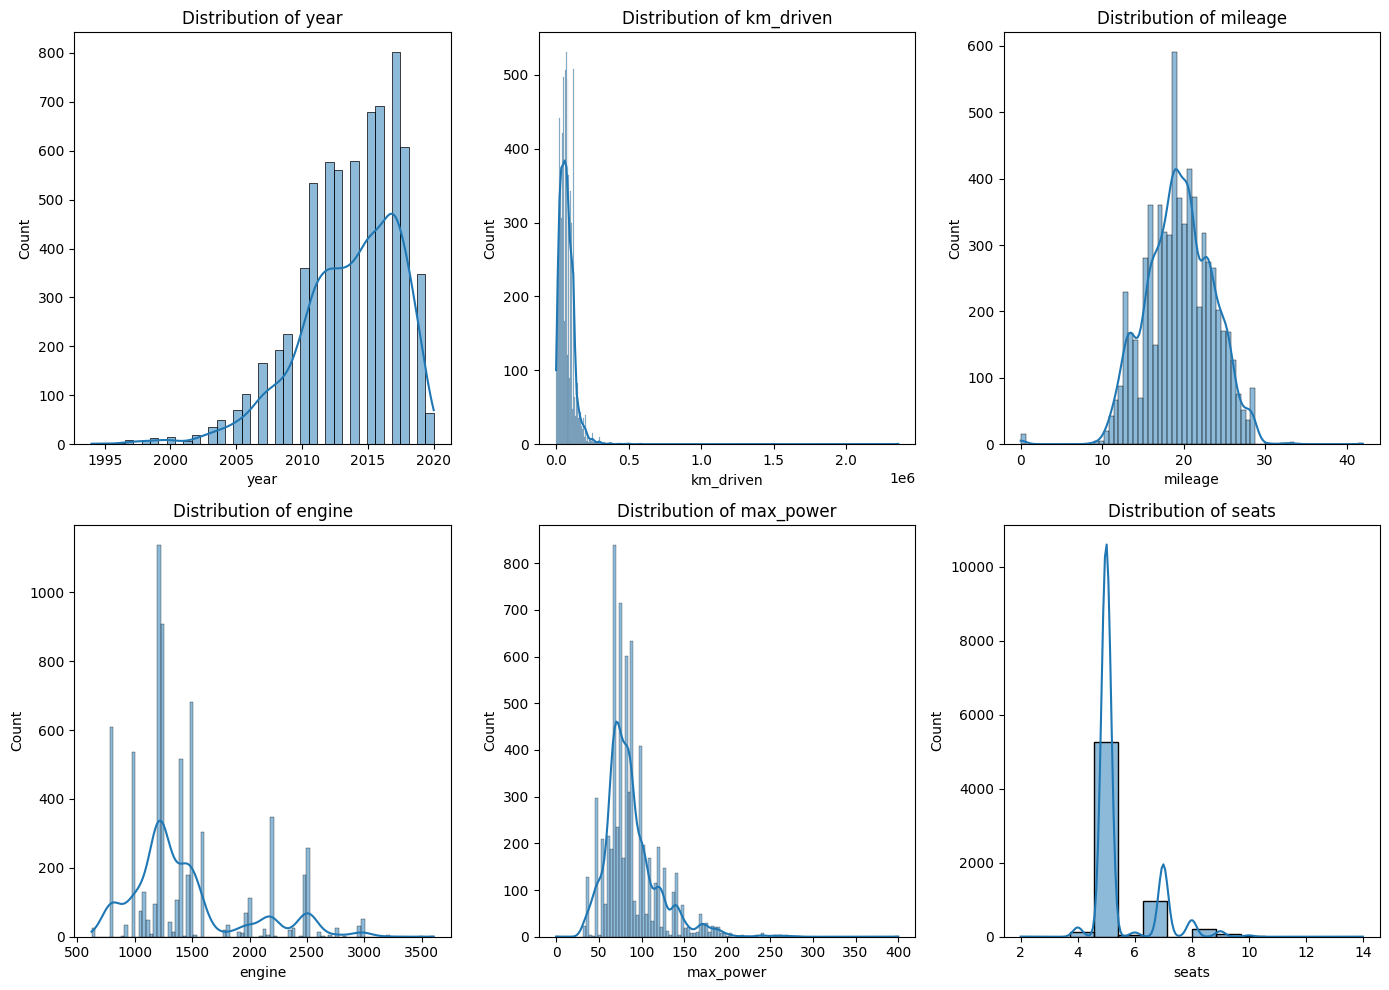

In [187]:
# Plot distribution of numerical features
plt.figure(figsize=(14, 10))
for i, column in enumerate(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(cars_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

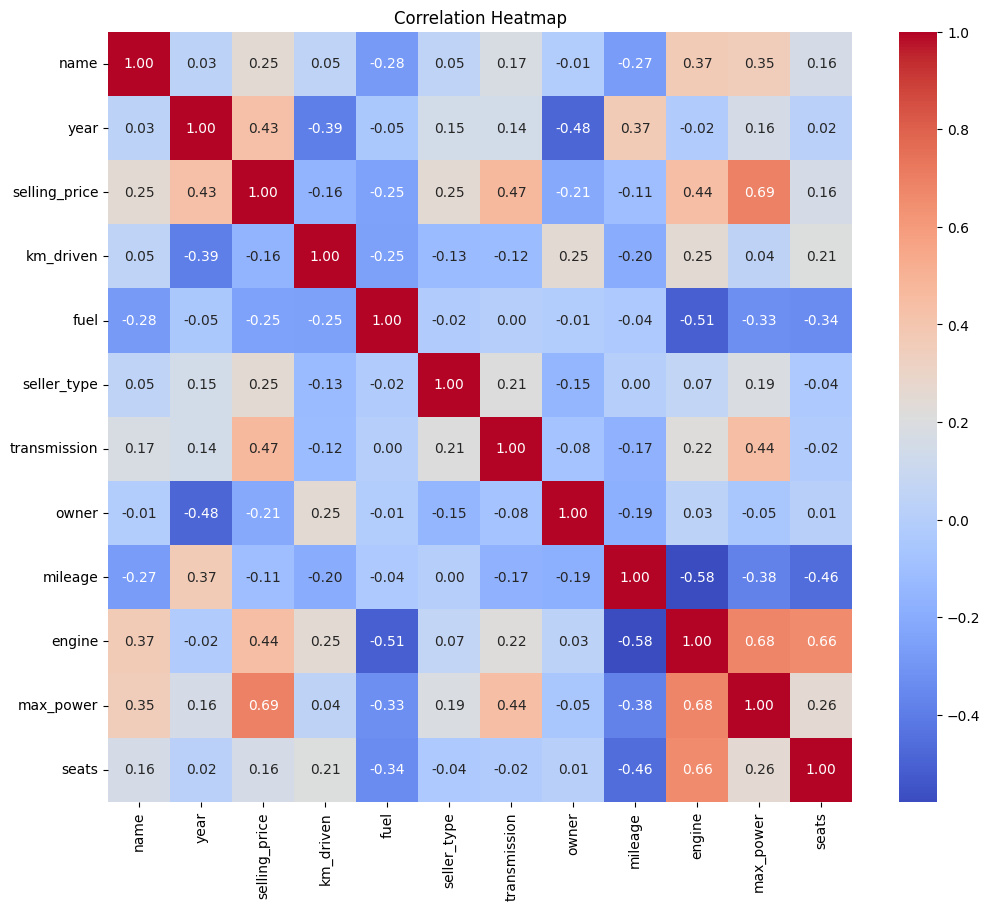

In [188]:
# Compute correlation matrix
corr = cars_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

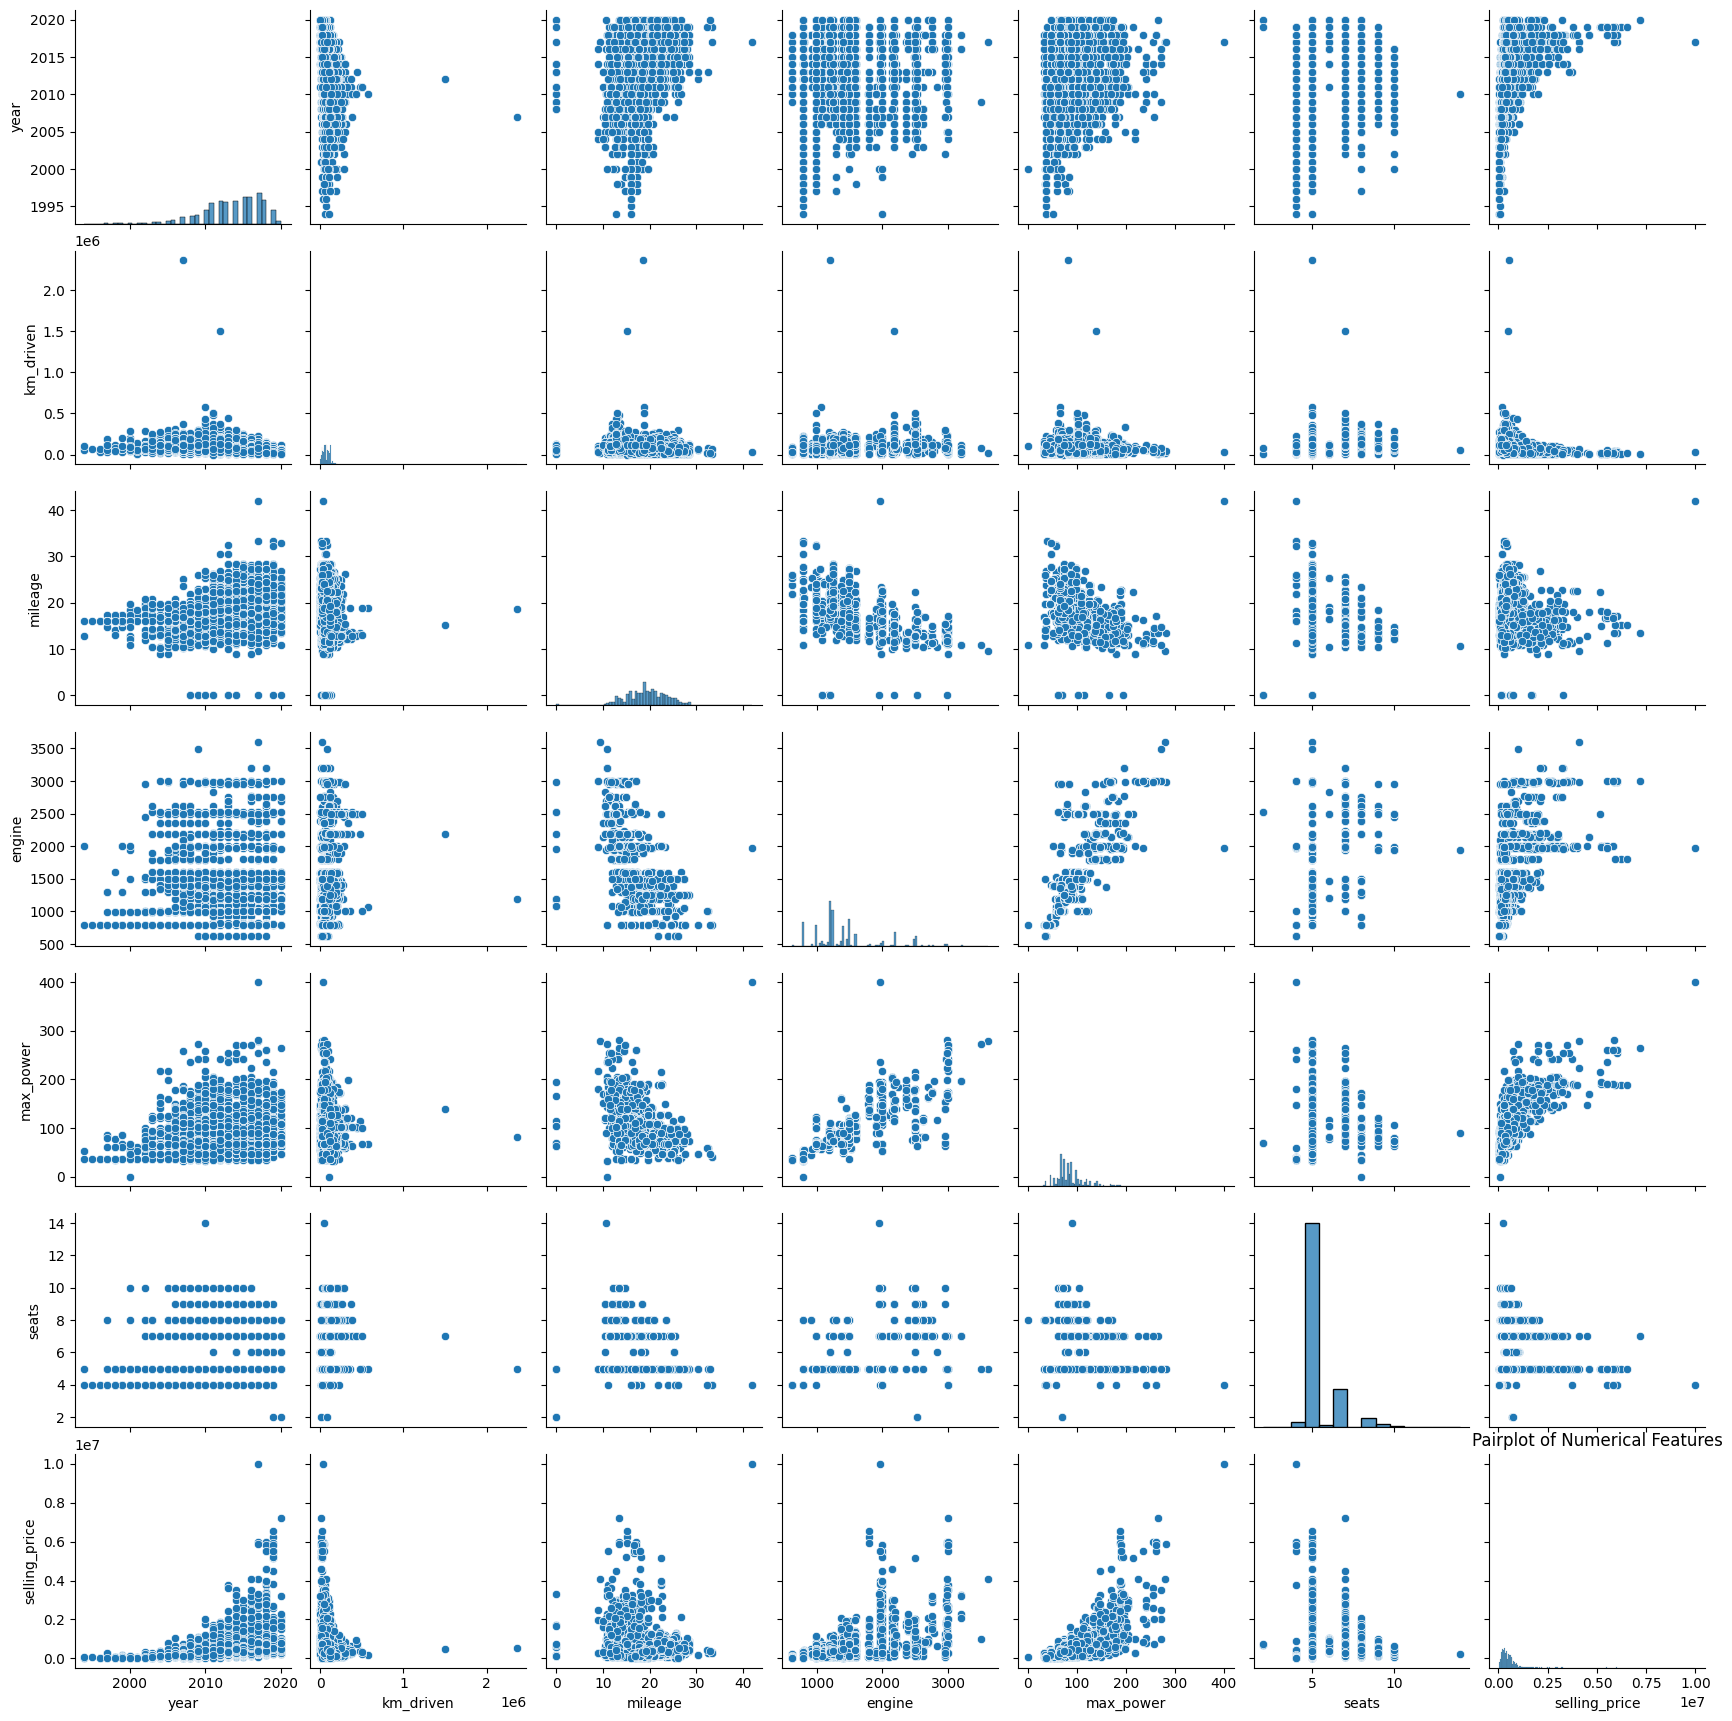

In [189]:
# Plot pairplot for numerical features
sns.pairplot(cars_data[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']])
plt.title('Pairplot of Numerical Features')
plt.show()


In [190]:
#MODELING AND TRAINING

In [191]:
# Prepare data for training
input_data = cars_data.drop(columns=['selling_price'])
output_data = cars_data['selling_price']

In [192]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)


In [193]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [194]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("======================")

Model: Linear Regression
Mean Squared Error: 59570733691.54961
R^2 Score: 0.6619521189811717
Model: Decision Tree
Mean Squared Error: 34834213886.91053
R^2 Score: 0.8023252113630224
Model: Random Forest
Mean Squared Error: 19009869655.169323
R^2 Score: 0.8921241059637023


In [195]:
# Random Forest - Feature Importance Plot
best_model = models['Random Forest']
best_model.fit(x_train, y_train)

RandomForestRegressor()

In [196]:
# Get feature importances
importances = best_model.feature_importances_
features = input_data.columns


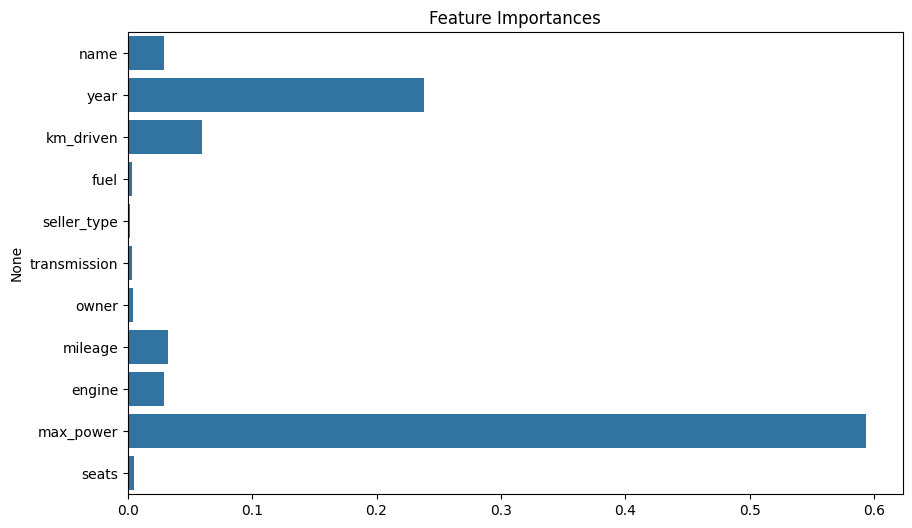

In [197]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()


In [198]:
# Predict on test data
y_pred = best_model.predict(x_test)


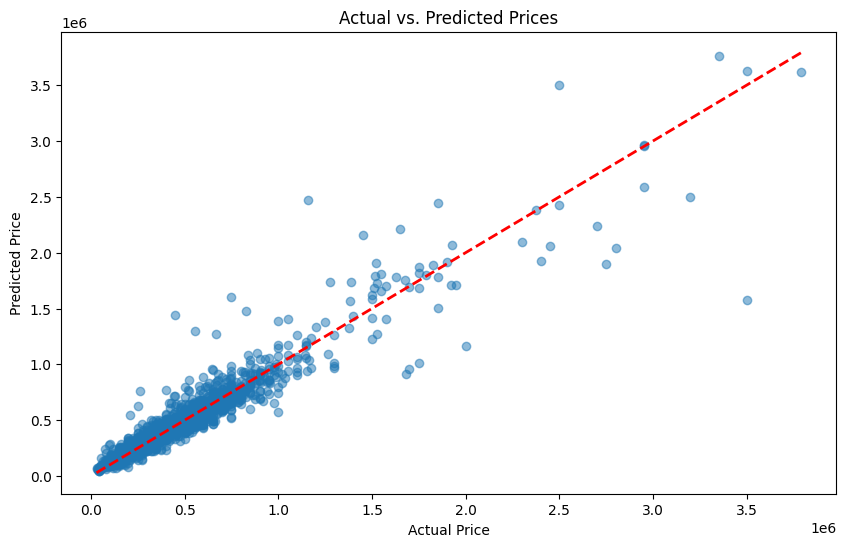

In [199]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [200]:
# Compute prediction errors
errors = y_test - y_pred

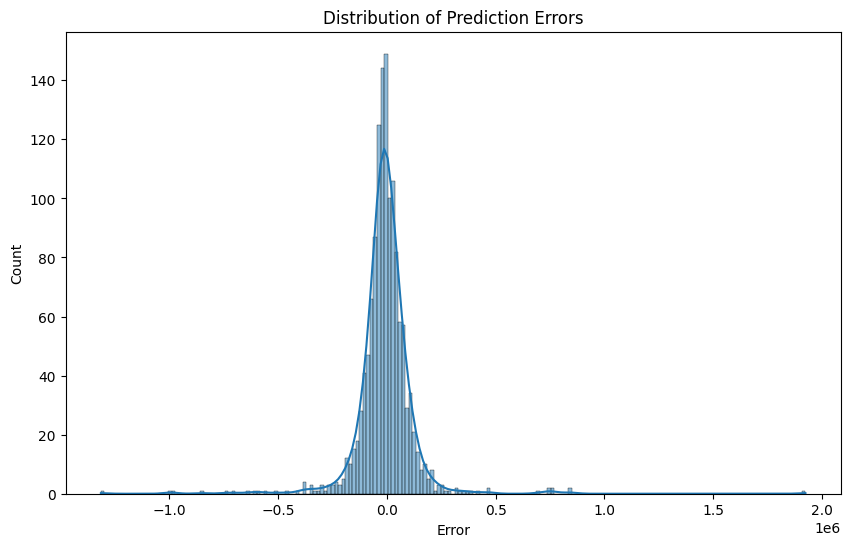

In [201]:
# Plot error distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.show()


In [202]:
predict = best_model.predict(x_test)

In [203]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2804,2,2008,110000,2,1,1,2,17.7,1497.0,78.0,5.0


In [204]:
input_data_model = pd.DataFrame(
    [[2,2008,110000,2,1,1,2,17.7,1497.0,78.0,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [205]:
best_model.predict(input_data_model)


array([200998.0952381])

In [206]:
import pickle as pk

In [207]:
pk.dump(model,open('model.pkl','wb'))